# Air pollution using sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/KIIT/Desktop/AIR POLLUTION/airquality.csv')

In [4]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [5]:
df.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [6]:
X = pd.DataFrame(np.c_[df['feature_2'], df['feature_2'], df['feature_3'],  df['feature_4'], df['feature_5']], columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'])
Y = df['target']

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
df1 = pd.read_csv("./Test.csv")

In [9]:
df1

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925
...,...,...,...,...,...
395,-0.436959,-0.575844,-1.620908,-0.222588,1.086013
396,-0.421324,-2.417543,0.876275,0.844565,0.171646
397,0.554728,1.768243,-0.897787,-1.193661,0.340563
398,-1.627172,0.856471,-0.000566,0.629387,0.453382


In [10]:
X_test = pd.DataFrame(np.c_[df['feature_1'], df['feature_2'], df['feature_3'],  df['feature_4'], df['feature_5']], columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'])

In [11]:
output = lin_model.predict(X_test)

In [12]:
bias = lin_model.intercept_
coeff = lin_model.coef_

print(bias)
print(coeff)

5.055536759704774
[46.57692586 46.57692586  8.07714418 43.26323635  2.3746108 ]


In [13]:
lin_model.score(X,Y)

0.8948536611229703

# Air Pollution from scratch

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("C:/Users/KIIT/Desktop/AIR POLLUTION/airquality.csv")
one_arr = np.ones((df.shape[0],))

In [16]:
x = np.c_[one_arr, df['feature_1'], df['feature_2'], df['feature_3'],  df['feature_4'], df['feature_5']]

In [17]:
x

array([[ 1.        ,  0.29341624, -0.94559871, -0.42110515,  0.40681602,
         0.52566183],
       [ 1.        , -0.83608408, -0.18922804, -0.77640262, -1.05383124,
         0.59799685],
       [ 1.        ,  0.23642511,  0.13283602, -0.14772298,  0.69985396,
        -0.18736416],
       ...,
       [ 1.        ,  1.04417694, -0.89920649,  1.73039905, -1.87105676,
         0.44251965],
       [ 1.        , -1.2691729 , -0.00505216,  1.85766873, -1.08036482,
         0.73633394],
       [ 1.        , -1.88400025, -0.84942743, -1.45227035,  0.48861308,
         1.4595758 ]])

In [18]:
y = df['target'].values
y = y.reshape((-1,))

In [19]:
def hypothesis(x,theta):
    return np.dot(x,theta)

In [20]:
def error(x,theta,y):
    err = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        err += (hx-y[i])**2
        
    return err

In [21]:
def gradient(x,theta,y):
    m = x.shape[0]
    
    grad = np.zeros((theta.shape))
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        
        grad += (hx - y[i])*x[i]
        
    return grad/m

In [22]:
def gradient_descent(x,y,learning_rate = 0.01):
    
    
    theta = np.zeros((x.shape[1],))
    
    err_list = []
    theta_list = []
    
    
    for i in range(1000):
        grad = gradient(x,theta,y)
        err = error(x,theta,y)
        
        err_list.append(err)
        theta_list.append(theta)
        
        
        theta -= (learning_rate*(grad))
        
    
    return theta,err_list,theta_list

In [23]:
final_theta , err_list , theta_list = gradient_descent(x,y)

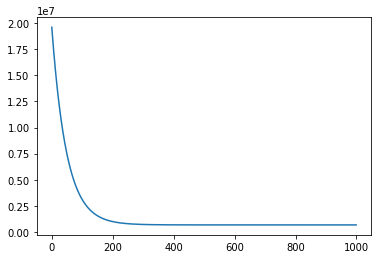

In [24]:
plt.plot(err_list)

In [25]:
print(final_theta)

[ 4.98825521 29.67987527 92.65908015  8.27756078 44.76510038  2.51769725]
